In [48]:
import pandas as pd
import glob
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn import svm

In [49]:
path_1 = r'../input/raw-statistical-fatures/RAW_statistical_features/AF7_Stat_features.csv' # use your path
path_2 = r'../input/raw-statistical-fatures/RAW_statistical_features/AF8_Stat_features.csv' # use your path
path_3 = r'../input/raw-statistical-fatures/RAW_statistical_features/TP10_Stat_features.csv' # use your path
path_4 = r'../input/raw-statistical-fatures/RAW_statistical_features/TP9_Stat_features.csv' # use your pa

data_1 = pd.read_csv(path_1,header=None)
data_2 = pd.read_csv(path_2,header=None)
data_3 = pd.read_csv(path_3,header=None)
data_4 = pd.read_csv(path_4,header=None)

In [50]:
x1 = data_1.loc[:,0:2]
x2 = data_2.loc[:,0:2]
x3 = data_3.loc[:,0:2]
x4 = data_4.loc[:,0:2]

y = data_1.loc[:,3]


In [51]:
data = pd.concat([x1,x2,x3,x4], axis=1)

In [45]:
data =data.fillna(data.mean())

X_train =np.asarray(data.astype(float))
y_train = np.asarray(y.astype(int))

scaler = StandardScaler()
X_train = scaler.fit_transform(data)

# PCA

pca = PCA(n_components=12)
pca.fit(X_train)
X_pca = pca.transform(X_train)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/opt/conda/lib/python3.7/site-packages/pandas/

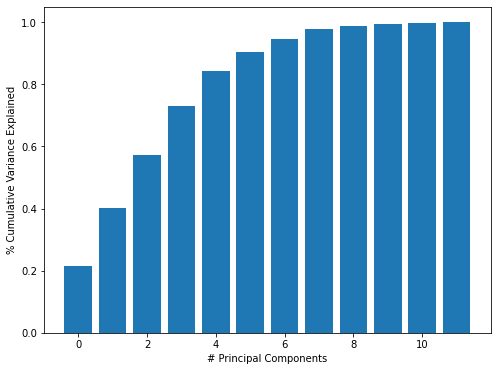

In [40]:
# Calculate cumulative explained variance across all PCs

cum_exp_var = []
var_exp = 0
for i in pca.explained_variance_ratio_:
    var_exp += i
    cum_exp_var.append(var_exp)

# Plot cumulative explained variance for all PCs

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(range(0,12), cum_exp_var)
ax.set_xlabel('# Principal Components')
ax.set_ylabel('% Cumulative Variance Explained');

(300, 12)

In [29]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_pca,y_train,test_size = 0.3, shuffle=True)

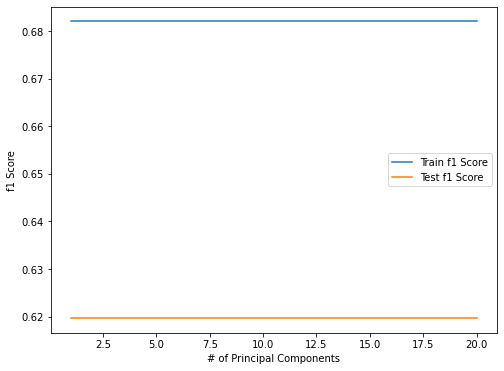

In [53]:
train_f1 = []
test_f1 = []

for i in range(20):
    
    X = X_pca[:,0:i+1]
    
    # Train-test-split
    X_train, X_test, y_train, y_test = train_test_split(data, y,
                                                        test_size=0.25,
                                                        random_state=42)

    # Perform feature scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Fit k-NN classifier and make predictions
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    train_f1.append(f1_score(y_train, y_pred_train))
    test_f1.append(f1_score(y_test, y_pred_test))

# Plot accuracy by n_neighbors
plt.figure(figsize=(8, 6))
plt.plot(range(1,21), train_f1, label='Train f1 Score')
plt.plot(range(1,21), test_f1, label='Test f1 Score')
plt.ylabel('f1 Score')
plt.xlabel('# of Principal Components')
plt.legend()
plt.show()

In [32]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(Xtrain, ytrain)

#Predict the response for test dataset
y_pred = clf.predict(Xtest)

In [33]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))

Accuracy: 0.4888888888888889


In [34]:


#print(X_train.shape),print(y_train.shape),print(X_test.shape),print(y_test.shape)

classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(Xtrain,ytrain)

acc= classifier.score(Xtest,ytest)*100
print(acc,'%')

40.0 %


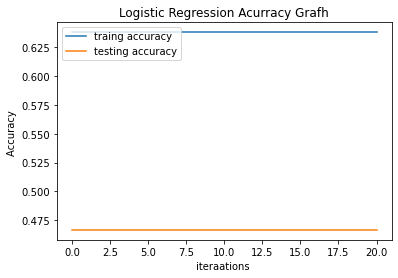

In [35]:



test_score=[]
train_score=[]
arr=5*(np.arange(5))

# max iteration in logistic Regression for training and storing test and train score

for i in arr:
    log1 = svm.SVC()
    log1.fit(Xtrain,ytrain)
    test_score.append(log1.score(Xtest,ytest))
    train_score.append(log1.score(Xtrain,ytrain))

#ploting the Score
import matplotlib.pyplot as plt

plt.xlabel('iteraations ')
plt.ylabel('Accuracy ')
plt.title('Logistic Regression Acurracy Grafh')
plt.plot(arr,train_score,label='traing accuracy')
plt.plot(arr,test_score,label='testing accuracy')
plt.legend(loc='upper left')

In [ ]:

model = DecisionTreeClassifier()


model.fit(Xtrain,ytrain)

acc= model.score(Xtest,ytest)*100
print(acc)


In [ ]:
""""#Reading AF7 Sensors Data

path = r'../input/raw-af7-statistical-features/AF7_SF' # use your path

all_files = glob.glob(path + "/*.csv")


li_1 = []

for filename in all_files:
 
    df_1 = pd.read_csv(filename, index_col=None, header=None)
    li_1.append(df_1)
    frame = pd.concat(li_1, axis=0, ignore_index=True)"""

In [ ]:
#data = frame.loc[0:,0:2]
#labels = frame.loc[0:,3]

In [ ]:
data =data.fillna(data.mean())

data =np.asarray(data.astype(float))
labels = np.asarray(labels.astype(int))

In [ ]:
#from sklearn import preprocessing

#normalized_arr = preprocessing.normalize(data)
#print(normalized_arr)

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2,random_state=109)

In [ ]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

# Online sources codings


In [1]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt

# Data processing, modeling, and model evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix

# Randomization
import random

In [ ]:
df = df.fillna(df.mean())